In [12]:
import io
import numpy as np
import PIL
import torch
import openpifpaf
import matplotlib.pyplot as plt

### Checks versions

In [6]:
print('OpenPifPaf version', openpifpaf.__version__)
print('PyTorch version', torch.__version__)

OpenPifPaf version 0.13.11
PyTorch version 1.13.1+cpu


### Gets an image and converts it to PIL image then numpy array

In [24]:
IMG_PATH = "Images/"
pil_im = PIL.Image.open((IMG_PATH+"shrek.JPG")).convert('RGB')
im = np.asarray(pil_im)

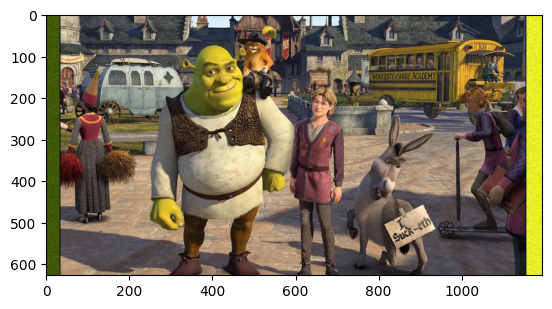

In [26]:
plt.imshow(im)

### Predicts

In [27]:
predictor = openpifpaf.Predictor(checkpoint='shufflenetv2k16')
predictions, gt_anns, image_meta = predictor.pil_image(pil_im)


In [37]:
openpifpaf.show.Canvas.show = True
openpifpaf.show.Canvas.image_min_dpi = 100

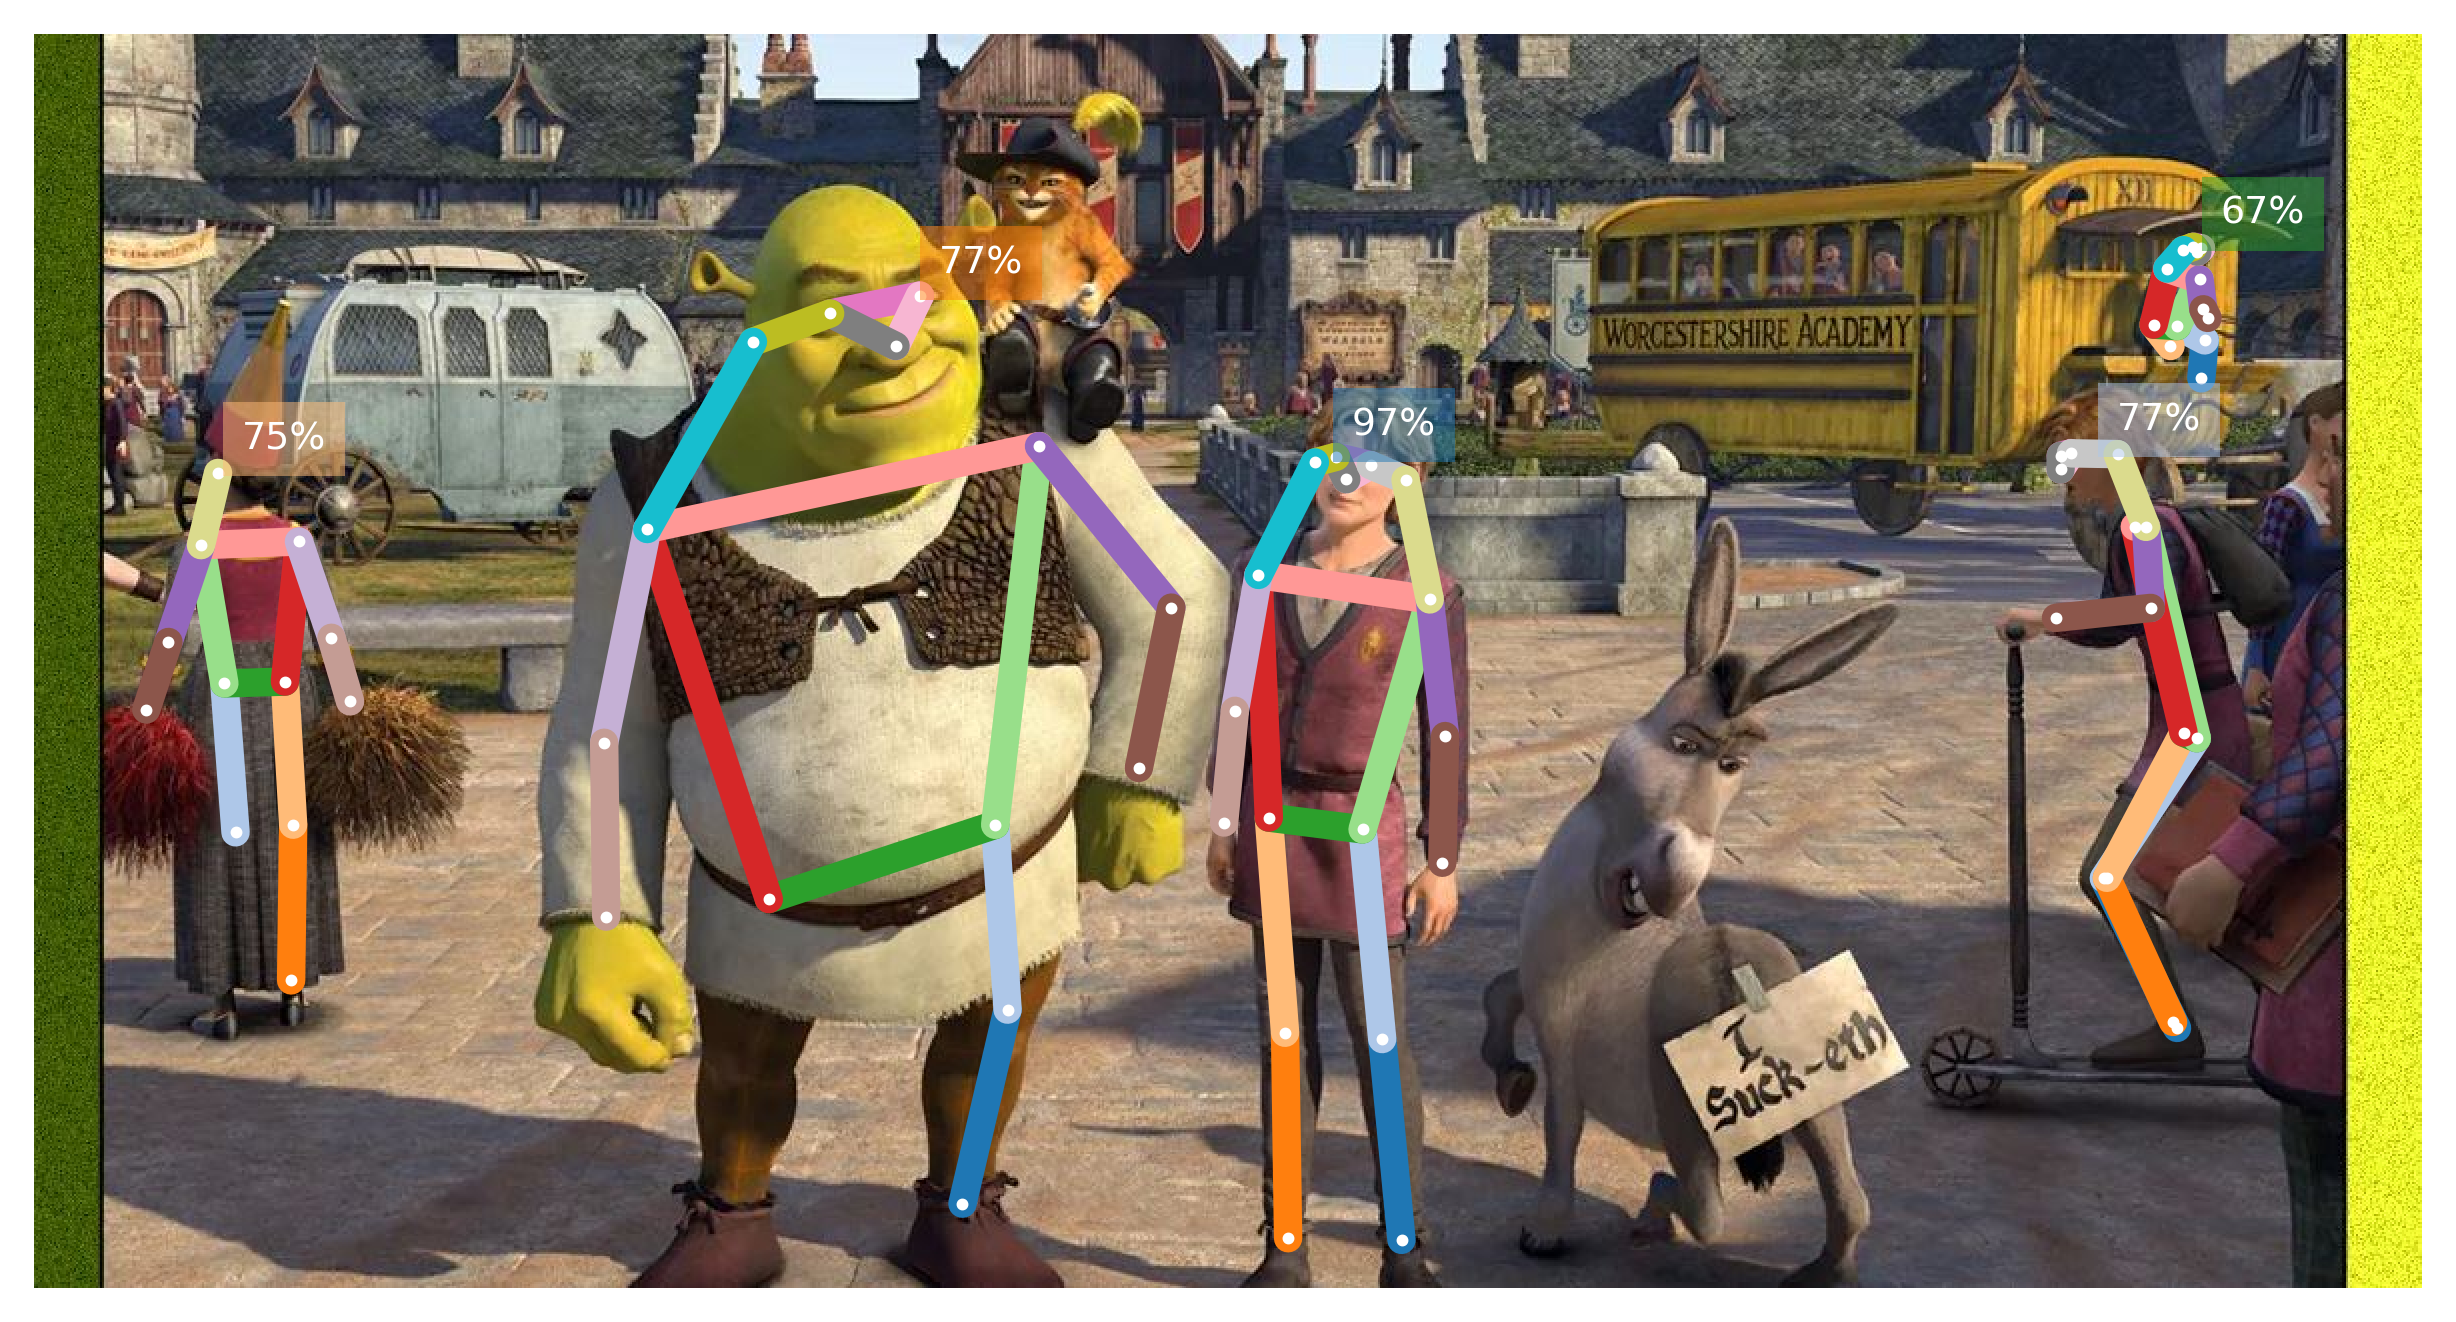

In [38]:
annotation_painter = openpifpaf.show.AnnotationPainter()
with openpifpaf.show.image_canvas(im) as ax:
    annotation_painter.annotations(ax, predictions)

In [51]:
!python -m openpifpaf.video --source=0 --video-output "test"

INFO:__main__:neural network device: cpu (CUDA available: False, count: 0)

[ WARN:0@2.168] global cap_msmf.cpp:471 `anonymous-namespace'::SourceReaderCB::OnReadSample videoio(MSMF): OnReadSample() is called with error status: -1072875772
[ WARN:0@2.168] global cap_msmf.cpp:483 `anonymous-namespace'::SourceReaderCB::OnReadSample videoio(MSMF): async ReadSample() call is failed with error status: -1072875772
[ WARN:1@2.168] global cap_msmf.cpp:1759 CvCapture_MSMF::grabFrame videoio(MSMF): can't grab frame. Error: -1072875772
Exception ignored in: <generator object AnimationFrame.iter at 0x000001F2CDD0C890>
Traceback (most recent call last):
  File "C:\Users\eliot\anaconda3\envs\semproj\lib\site-packages\openpifpaf\show\animation_frame.py", line 134, in iter
    self.video_writer.finish()
  File "C:\Users\eliot\anaconda3\envs\semproj\lib\site-packages\matplotlib\animation.py", line 334, in finish
    out, err = self._proc.communicate()
AttributeError: 'FFMpegWriter' object has no attribute '_proc'



INFO:openpifpaf.decoder.factory:No specific decoder requested. Using the first one from:
  --decoder=cifcaf:0
  --decoder=posesimilarity:0
Use any of the above arguments to select one or multiple decoders and to suppress this message.
INFO:openpifpaf.predictor:neural network device: cpu (CUDA available: False, count: 0)
INFO:openpifpaf.show.animation_frame:video output = test
